In [4]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('data/day0.csv', delimiter=';')
products = df['product'].unique()
df.head()

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,-2,0,AMETHYSTS,10002,1,9996.0,2.0,9995.0,29.0,10004,2,10005.0,29.0,NaN,NaN,10003.0,0.000000
1,-2,0,STARFRUIT,5002,1,4997.0,31.0,NaN,NaN,5003,31,NaN,NaN,NaN,NaN,5002.5,0.000000
2,-2,100,AMETHYSTS,9996,2,9995.0,22.0,NaN,NaN,10004,2,10005.0,22.0,NaN,NaN,10000.0,2.000000
3,-2,100,STARFRUIT,4997,24,NaN,NaN,NaN,NaN,5003,2,5004.0,22.0,NaN,NaN,5000.0,1.925293
4,-2,200,STARFRUIT,4997,2,4996.0,20.0,NaN,NaN,5003,20,NaN,NaN,NaN,NaN,5000.0,2.134766


In [6]:
df_star = df[df['product'] == products[1]]
df_star.head(10)

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
1,-2,0,STARFRUIT,5002,1,4997.0,31.0,NaN,NaN,5003,31,NaN,NaN,NaN,NaN,5002.5,0.000000
3,-2,100,STARFRUIT,4997,24,NaN,NaN,NaN,NaN,5003,2,5004.0,22.0,NaN,NaN,5000.0,1.925293
4,-2,200,STARFRUIT,4997,2,4996.0,20.0,NaN,NaN,5003,20,NaN,NaN,NaN,NaN,5000.0,2.134766
7,-2,300,STARFRUIT,4996,31,NaN,NaN,NaN,NaN,5003,31,NaN,NaN,NaN,NaN,4999.5,-3.100586
9,-2,400,STARFRUIT,4995,27,NaN,NaN,NaN,NaN,5002,27,NaN,NaN,NaN,NaN,4998.5,-0.179688
11,-2,500,STARFRUIT,4996,30,NaN,NaN,NaN,NaN,5003,30,NaN,NaN,NaN,NaN,4999.5,-2.328125
12,-2,600,STARFRUIT,4999,5,4997.0,6.0,4996.0,25.0,5003,25,NaN,NaN,NaN,NaN,5001.0,-3.693359
15,-2,700,STARFRUIT,4997,2,4996.0,23.0,NaN,NaN,5003,23,NaN,NaN,NaN,NaN,5000.0,-7.140625
17,-2,800,STARFRUIT,4997,30,NaN,NaN,NaN,NaN,5003,1,5004.0,29.0,NaN,NaN,5000.0,-15.746094
19,-2,900,STARFRUIT,4997,23,NaN,NaN,NaN,NaN,5003,1,5004.0,22.0,NaN,NaN,5000.0,-16.859375


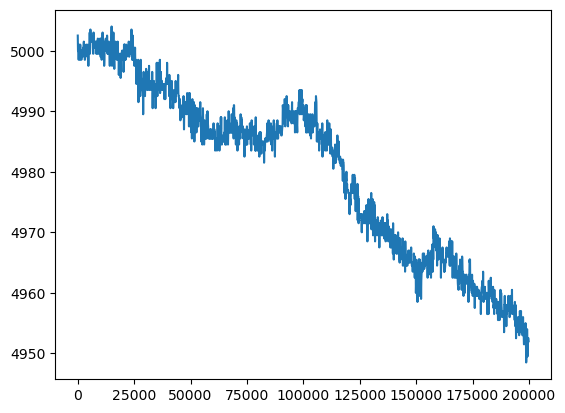

In [7]:
product1 = df[df['product'] == products[0]]
product2 = df[df['product'] == products[1]]

price_product1 = product1[['timestamp','mid_price']]
price_product2 = product2[['timestamp','mid_price']]

joined = pd.merge(price_product1, price_product2, on='timestamp', how='inner')

plt.figure()
plt.plot(joined['timestamp'], joined['mid_price_y'])

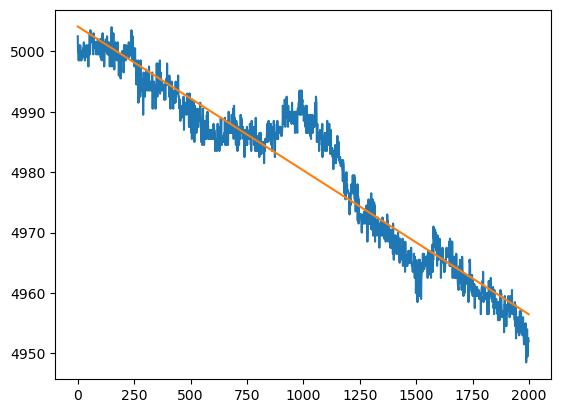

In [55]:

model = LinearRegression()

X  = (df_star['timestamp'] /100).values.reshape(-1,1)
Y = df_star['mid_price']
model = model.fit(X, Y)
model.score(X,Y)

model.coef_, model.intercept_

plt.plot(X,Y)
plt.plot(X,model.predict(X))

In [54]:
X.shape, Y.shape

((2000, 1), (2000,))

count     2000.000000
mean     10000.053750
std          1.481328
min       9996.500000
25%      10000.000000
50%      10000.000000
75%      10000.000000
max      10003.500000
Name: mid_price_x, dtype: float64

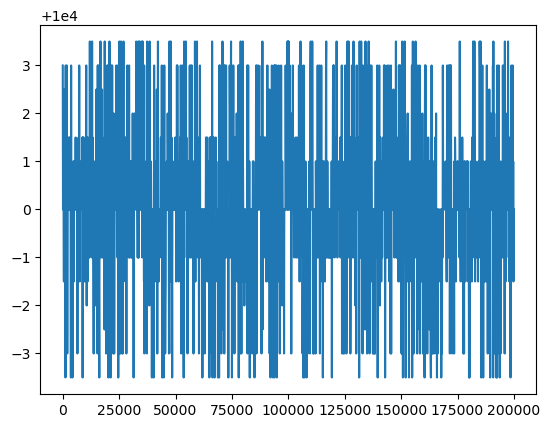

In [9]:
plt.figure()
plt.plot(joined['timestamp'], joined['mid_price_x'])
joined['mid_price_x'].describe()

,timestamp,mid_price_y
,count,count
mid_price_x,,
9996.5,0.0280,0.0280
9997.0,0.0485,0.0485
9997.5,0.0050,0.0050
9998.0,0.0075,0.0075
9998.5,0.0470,0.0470
9999.0,0.0860,0.0860
10000.0,0.5295,0.5295
10001.0,0.0950,0.0950


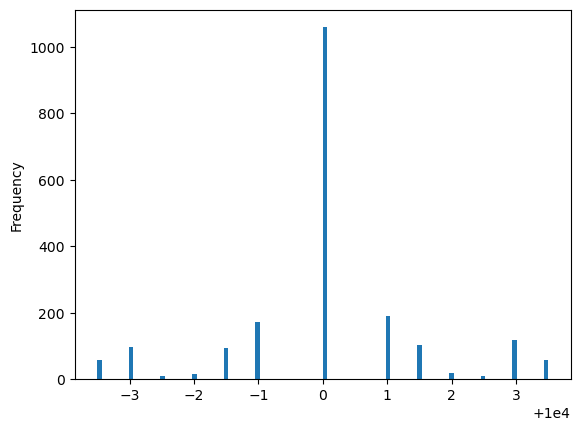

In [18]:
joined['mid_price_x'].plot.hist(bins=100)
joined.groupby(['mid_price_x']).agg(['count'])/len(joined)

In [17]:
model = LinearRegression()
x = joined['mid_price_x'].values.reshape(-1, 1)
y = joined['mid_price_y'].values.reshape(-1, 1)

model = model.fit(y, x)

In [21]:
model.intercept_, model.coef_

(array([9981.67681914]), array([[0.00368992]]))

In [37]:
from sklearn.linear_model import LinearRegression


Y = joined['mid_price_y']
Y = df_star['bid_price_1']
X = []
y = []
for i in range(len(Y)):
    x = Y[i-10:i-1]
    # x[i:] = 0
    X.append(x)
    y.append(Y[i:i+10])
X = np.array(X[10:-10])
Y = np.array(y[10:-10])

X.shape, Y.shape

((1980, 9), (1980, 10))

In [16]:
X[0], Y

(array([5002, 4997, 4997, 4996, 4995, 4996, 4999, 4997, 4997], dtype=int64),
 array([[4996, 4998, 4997, ..., 4997, 4997, 4997],
        [4998, 4997, 4997, ..., 4997, 4997, 4996],
        [4997, 4997, 4997, ..., 4997, 4996, 4997],
        ...,
        [4949, 4948, 4949, ..., 4949, 4949, 4949],
        [4948, 4949, 4948, ..., 4949, 4949, 4949],
        [4949, 4948, 4948, ..., 4949, 4949, 4949]], dtype=int64))

In [38]:
X = (X - X.mean()) / X.max() 
Y= (Y - Y.mean()) / Y.max()

In [28]:
X.shape, Y.shape

((1980, 9), (1980, 10))

In [39]:
model = LinearRegression().fit(X, Y)
model.score(X,Y)

0.9824344882629887

In [40]:
model.predict([X[167]]), Y[167]

(array([[0.00386263, 0.00381256, 0.00382966, 0.00380978, 0.00380414,
         0.00379082, 0.00385071, 0.00385213, 0.00381045, 0.00381682]]),
 array([0.00468787, 0.00368847, 0.00348859, 0.00368847, 0.00368847,
        0.00348859, 0.00348859, 0.00348859, 0.00348859, 0.00368847]))

In [47]:
X[10]

array([4998.5, 5001. , 4999.5, 5000. , 5000. , 4999.5, 4998.5, 4999.5,
       5000. ])

In [69]:
# co = np.abs(model.coef_)
# co = -np.sort(-co)
# co[:1000]
model.coef_, model.intercept_

(array([0.08318381, 0.08184419, 0.052289  , 0.06817514, 0.0789269 ,
        0.11973523, 0.12258035, 0.18677331, 0.2070171 ]),
 -2.7332801915326854)